In [1]:
DATASET_DIR = "/kaggle/input/dicommammography"
!rm -rf ./* # clear working dir
VINDR_SELECTED_SUBSET_CSV = DATASET_DIR+'/vindr-mammo_selected_images.csv'
VINDR_BIRADS_1_2_CSV = DATASET_DIR+'/vindr-mammo_birads-1_2.csv'
VINDR_ALL_CSV = 'https://drive.usercontent.google.com/u/1/uc?id=12dZ1KqdOs79jB17uFAfvrb-J4EatpQPr&export=download'
VINDR_MULTI_VIEW_CSV = DATASET_DIR+'/vindr_cc_mlo_data.csv'
CBIS_DDSM_ALL_CSV = DATASET_DIR+'/cbis_ddsm_all.csv'
CBIS_DDSM_MULTI_VIEW_CSV = DATASET_DIR+'/cbis_ddsm_dual_view_all.csv'


VINDR_ZIP_FINDINGS_ONLY = DATASET_DIR+'/vindr-mammo_findings_only'
VINDR_ZIP_SELECTED_SUBSET = DATASET_DIR+'/VinDr-Mammo_Balanced_Subset'
VINDR_ZIP_BIRADS_1_2 = DATASET_DIR+'/VinDr-Mammo_BIRADS_1&2_Subset'
CBIS_ZIP_CALC_TRAIN = DATASET_DIR+'/CBIS-DDSM_Calc_Training'
CBIS_ZIP_CALC_TEST = DATASET_DIR+'/CBIS-DDSM_Calc_Test'
CBIS_ZIP_MASS_TRAIN = DATASET_DIR+'/CBIS-DDSM_Mass_Training'
CBIS_ZIP_MASS_TEST = DATASET_DIR+'/CBIS-DDSM_Mass_Test'

cbis_zip_list = [CBIS_ZIP_MASS_TRAIN, CBIS_ZIP_CALC_TRAIN, CBIS_ZIP_MASS_TEST, CBIS_ZIP_CALC_TEST]
label_index = {"BI-RADS 0": 0.0,"BI-RADS 1":1.0,"BI-RADS 2":2.0,"BI-RADS 3":3.0,"BI-RADS 4":4.0,"BI-RADS 5":5.0,}
index_label = {val:key for key,val in label_index.items()}

import os
import random
import pandas as pd
import numpy as np
# import tensorflow as tf

def seed_everything(seed):
    print("seed everything using", seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
#     tf.random.set_seed(seed)

seed_everything(int(1e4*np.e))

columns = ['pair_id', 'image_path_CC', 'zip_file_CC', 'BI_RADS_CC',
                      'image_path_MLO',  'zip_file_MLO', 'BI_RADS_MLO',
           'CC_MLO_Same_BIRADS']
vindr_multi_view = pd.read_csv(VINDR_MULTI_VIEW_CSV)
vindr_multi_view['pair_id'] = vindr_multi_view.apply(lambda row: f"{row['study_id']}_{row['laterality']}" , axis=1)
vindr_multi_view = vindr_multi_view.loc[:,columns]
cbis_multi_view = pd.read_csv(CBIS_DDSM_MULTI_VIEW_CSV)\
                  .rename(columns={
                      'subset_zip_CC':'zip_file_CC',
                      'subset_zip_MLO':'zip_file_MLO',
                      'assessment_CC':'BI_RADS_CC',
                      'assessment_MLO':'BI_RADS_MLO'
                      })
cbis_multi_view = cbis_multi_view.loc[:,columns]

all_multi_view_df = pd.concat([vindr_multi_view, cbis_multi_view]).reset_index(drop=True)

def normalize_birads(row):
    if row['BI_RADS_CC'] in label_index and row['BI_RADS_MLO'] in label_index:
        row['BI_RADS_CC'] = label_index[row['BI_RADS_CC']]
        row['BI_RADS_MLO'] = label_index[row['BI_RADS_MLO']]
        return row
    else:
        row['BI_RADS_CC'] = float(row['BI_RADS_CC'])
        row['BI_RADS_MLO'] = float(row['BI_RADS_MLO'])
        return row
    
def kaggle_zipfile_path(row):
    for view in ['CC', 'MLO']:
        orig_zip_file = row[f'zip_file_{view}']
        if not isinstance(orig_zip_file, str):
            continue
        kaggle_filename = orig_zip_file.split('/')[-1].replace('.zip','_zip').replace('&','')
        kaggle_zip_file = f"{DATASET_DIR}/{kaggle_filename}"
        row[f'zip_file_{view}'] = kaggle_zip_file
    return row

all_multi_view_df = all_multi_view_df.apply(normalize_birads, axis=1)
all_multi_view_df = all_multi_view_df.apply(kaggle_zipfile_path, axis=1)
all_multi_view_df = all_multi_view_df.dropna().reset_index(drop=True)
all_multi_view_df['BI_RADS_MAX'] = all_multi_view_df.apply(lambda row: max(row['BI_RADS_CC'], row['BI_RADS_MLO']), axis=1)
all_multi_view_df

seed everything using 27182


,pair_id,image_path_CC,zip_file_CC,BI_RADS_CC,image_path_MLO,zip_file_MLO,BI_RADS_MLO,CC_MLO_Same_BIRADS,BI_RADS_MAX
0,0025a5dc99fd5c742026f0b2b030d3e9_L,vindr-mammo/451562831387e2822923204cf8f0873e.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,vindr-mammo/2ddfad7286c2b016931ceccd1e2c7bbc.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,True,1.0
1,0025a5dc99fd5c742026f0b2b030d3e9_R,vindr-mammo/fcf12c2803ba8dc564bf1287c0c97d9a.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,vindr-mammo/47c8858666bcce92bcbd57974b5ce522.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,1.0,True,1.0
2,0028fb2c7f0b3a5cb9a80cb0e1cdbb91_L,vindr-mammo/3704f91985dcbc69f6ac2803523d1ecb.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,vindr-mammo/7fc1f1bb8bb1a7efaf7104e49c4d8b86.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,True,2.0
3,0028fb2c7f0b3a5cb9a80cb0e1cdbb91_R,vindr-mammo/c4ce68631bf70949570ded31a3c69e60.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,vindr-mammo/16e58fc1d65fa7587247e6224ee96527.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,True,2.0
4,0034765af074f93ed33d5e8399355caf_L,vindr-mammo/68f09c18925a66ef2840d4a62f237b31.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,vindr-mammo/b664cf1e7c968896144a3a2005cd3eb4.d...,/kaggle/input/dicommammography/VinDr-Mammo_Bal...,2.0,True,2.0
...,...,...,...,...,...,...,...,...,...
2688,P_02460_RIGHT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,True,5.0
2689,P_02508_LEFT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,4.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,4.0,True,4.0
2690,P_02518_RIGHT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,5.0,True,5.0
2691,P_02559_RIGHT,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,3.0,Calc-Training_full_mammogram_images_1-doiJNLP-...,/kaggle/input/dicommammography/CBIS-DDSM_Calc_...,3.0,True,3.0


In [2]:
try:
    import pydicom
except ModuleNotFoundError:
    !pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.8 MB ? eta -:--:--

     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/1.8 MB 1.4 MB/s eta 0:00:02

     ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/1.8 MB 2.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━ 0.9/1.8 MB 5.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 1.6/1.8 MB 7.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


## Dataset Splitting

In [3]:
ds = all_multi_view_df.copy()
print(len(ds))
birads_counts = ds.BI_RADS_MAX.value_counts()
print('\n'.join([f"{label} : {birads_counts.get(i)}" for label, i in label_index.items()]))

2693
BI-RADS 0 : None
BI-RADS 1 : 464
BI-RADS 2 : 416
BI-RADS 3 : 500
BI-RADS 4 : 974
BI-RADS 5 : 339


In [4]:
index = [106, 107, 1245, 1420] # index lainya yang udah fix : 1730, 1844, 1909, 1947, 2068, 2086, 2149, 2316, 2347, 2367, 2401, 2408, 2418, 2419, 2453, 2478, 2590, 2653]
ds = ds.drop(index).reset_index(drop=True)
birads_counts = ds.BI_RADS_MAX.value_counts()
print(len(ds))
print('\n'.join([f"{label} : {birads_counts.get(i)}" for label, i in label_index.items()]))

2689
BI-RADS 0 : None
BI-RADS 1 : 464
BI-RADS 2 : 415
BI-RADS 3 : 500
BI-RADS 4 : 971
BI-RADS 5 : 339


In [5]:
def get_kfold_df(k, kfold_ds=ds.copy(), balanced=True):
    kfold_ds[f"k{k}_split"] = "fold-sisa"
    def train_val_split(_df, k):
        split = 1 / k
        split = round(len(_df)*split) # splitting to k-fold / (100/k)% data each fold
        start_index = 0
        indxs = list(_df.index)
        for i in range(k):
            indx = indxs[start_index:(i+1)*split]
            _df.loc[indx, f"k{k}_split"] = f'fold-{i}'
            start_index+=split
        return _df
    if balanced:
        get_n_sample = lambda _ : birads_counts.min()
        lowest_count_birads = birads_counts.argmin() + 1.0
        low_birads = kfold_ds.loc[ds.BI_RADS_MAX == lowest_count_birads]
        kfold_ds.loc[kfold_ds.BI_RADS_MAX == lowest_count_birads] = train_val_split(low_birads, k)
    else:
        lowest_count_birads = -1
        get_n_sample = lambda df: len(df)
    
    for key in index_label:
        if key == lowest_count_birads or key == 0.0:
            continue
        biradn = kfold_ds.loc[kfold_ds.BI_RADS_MAX == key]
        biradn = biradn.sample(get_n_sample(biradn))
        biradn = train_val_split(biradn, k)
        kfold_ds.iloc[biradn.index,:] = biradn
    return kfold_ds

def print_kfold_birads_counts(k, balanced=True):
    kfold_ds = get_kfold_df(k, balanced=balanced)
    print(kfold_ds[f"k{k}_split"].value_counts())
    for i in range(k):
        fold_birads_counts = kfold_ds[kfold_ds[f"k{k}_split"] == f"fold-{i}"].BI_RADS_MAX.value_counts()
        print(f"fold-{i} birads".center(30, "-"))
        print('\n'.join([f"{label} : {fold_birads_counts.get(i)}" for label, i in label_index.items()]))
    fold_birads_counts = kfold_ds[kfold_ds[f"k{k}_split"] == "fold-sisa"].BI_RADS_MAX.value_counts()
    print(f"fold-sisa birads".center(30, "-"))
    print('\n'.join([f"{label} : {fold_birads_counts.get(i)}" for label, i in label_index.items()]))

In [6]:
print_kfold_birads_counts(k=3)

k3_split
fold-sisa    994
fold-1       565
fold-0       565
fold-2       565
Name: count, dtype: int64
--------fold-0 birads---------
BI-RADS 0 : None
BI-RADS 1 : 113
BI-RADS 2 : 113
BI-RADS 3 : 113
BI-RADS 4 : 113
BI-RADS 5 : 113
--------fold-1 birads---------
BI-RADS 0 : None
BI-RADS 1 : 113
BI-RADS 2 : 113
BI-RADS 3 : 113
BI-RADS 4 : 113
BI-RADS 5 : 113
--------fold-2 birads---------
BI-RADS 0 : None
BI-RADS 1 : 113
BI-RADS 2 : 113
BI-RADS 3 : 113
BI-RADS 4 : 113
BI-RADS 5 : 113
-------fold-sisa birads-------
BI-RADS 0 : None
BI-RADS 1 : 125
BI-RADS 2 : 76
BI-RADS 3 : 161
BI-RADS 4 : 632
BI-RADS 5 : None


In [7]:
#  balanced-fold unbalance dataset
print_kfold_birads_counts(k=3, balanced=False)

k3_split
fold-0       897
fold-1       897
fold-2       894
fold-sisa      1
Name: count, dtype: int64
--------fold-0 birads---------
BI-RADS 0 : None
BI-RADS 1 : 155
BI-RADS 2 : 138
BI-RADS 3 : 167
BI-RADS 4 : 324
BI-RADS 5 : 113
--------fold-1 birads---------
BI-RADS 0 : None
BI-RADS 1 : 155
BI-RADS 2 : 138
BI-RADS 3 : 167
BI-RADS 4 : 324
BI-RADS 5 : 113
--------fold-2 birads---------
BI-RADS 0 : None
BI-RADS 1 : 154
BI-RADS 2 : 138
BI-RADS 3 : 166
BI-RADS 4 : 323
BI-RADS 5 : 113
-------fold-sisa birads-------
BI-RADS 0 : None
BI-RADS 1 : None
BI-RADS 2 : 1
BI-RADS 3 : None
BI-RADS 4 : None
BI-RADS 5 : None


In [8]:
k_range = 3, 6
for balancing in ["balanced", "unbalanced"]:
    balanced = True if balancing=="balanced" else False
    kfold_ds = ds.copy()
    collumns_to_save = ["pair_id","BI_RADS_MAX"]
    for k in range(*k_range):
        kfold_ds = get_kfold_df(k, kfold_ds, balanced)
        collumns_to_save.append(f"k{k}_split")
    kfold_ds = kfold_ds.loc[:, collumns_to_save].rename(columns={"BI_RADS_MAX":"label"})
    print(len(kfold_ds))
    kfold_ds.to_csv(f"{balancing}_k-fold_splits.csv",index=False)
kfold_ds.head()

2689


2689


,pair_id,label,k3_split,k4_split,k5_split
0,0025a5dc99fd5c742026f0b2b030d3e9_L,1.0,fold-0,fold-3,fold-4
1,0025a5dc99fd5c742026f0b2b030d3e9_R,1.0,fold-0,fold-2,fold-3
2,0028fb2c7f0b3a5cb9a80cb0e1cdbb91_L,2.0,fold-1,fold-2,fold-4
3,0028fb2c7f0b3a5cb9a80cb0e1cdbb91_R,2.0,fold-0,fold-1,fold-3
4,0034765af074f93ed33d5e8399355caf_L,2.0,fold-0,fold-0,fold-2


## processing DICOM

In [9]:
#@title function to load dicom
# core function from :
# https://www.kaggle.com/code/raddar/convert-dicom-to-np-array-the-correct-way/notebook

import cv2
import pydicom
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut
from io import BytesIO


def image_resize(image, width = None, height = None, inter = cv2.INTER_LINEAR):
    dim = None
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized

def crop_coords(img):
    """
    Crop ROI from image.
    """
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img, (5, 5), 0.1)
    img_16bit = cv2.normalize(blur, None, 0, 65535, cv2.NORM_MINMAX, dtype=cv2.CV_16U) 
    _, breast_mask = cv2.threshold(img_16bit,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    cnts, _ = cv2.findContours(breast_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(cnts, key = cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    return (x, y, w, h)

def otsu_roi_crop(data):
    xmin, ymin, w, h = crop_coords(data)
    xmax = xmin + w
    ymax = ymin + h
    data = data[ymin:ymax,xmin:xmax]
    return data

def pad_to_scale_ratio(img, laterality, scale):
    height, width = img.shape[:2]
    target_ratio = scale[0] / scale[1]

    if width / height > target_ratio:  # Image is wider than 9:16
        new_width = width
        new_height = int(width / target_ratio)
        top_bottom_padding = (new_height - height) // 2
        left_right_padding = 0
    else:  # Image is taller than 9:16
        new_width = int(height * target_ratio)
        new_height = height
        top_bottom_padding = 0
        if laterality == "R":
            left_right_padding = (new_width - width)
        else:
            left_right_padding = 0

    # Create a blank image with the target dimensions
    padded_img = np.zeros((new_height, new_width), dtype=np.uint8)

    # Copy the original image onto the padded image with the calculated offsets
    padded_img[top_bottom_padding:top_bottom_padding + height, 
               left_right_padding:left_right_padding + width] = img

    return padded_img

def get_laterality(data):
    sum_L = np.sum(data[:, :20])
    sum_R = np.sum(data[:, -20:])
    if sum_L == sum_R:
        laterality = "<?>"
    else:
        laterality = 'L' if sum_L > sum_R else 'R'
    return laterality

def read_dicom(path,
               voi_lut:bool=True,
               fix_monochrome:bool=True,
               pad_scale:tuple=None,
               roi_crop:str=None,
               resize:tuple|list=(288, 512)
               ):
    dicom = pydicom.read_file(path)
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    # otsu roi cropping
    if roi_crop == 'otsu':
#         data = pad_to_scale_ratio(data, get_laterality(data), (1,1))
#         data = cv2.resize(data, (1024, 1024), interpolation=cv2.INTER_LINEAR)
        data = otsu_roi_crop(data)
    # padding
    if pad_scale is not None:
        data = pad_to_scale_ratio(data, get_laterality(data), pad_scale)
    # resize
    if resize is not None:
        data = cv2.resize(data, resize, interpolation=cv2.INTER_LINEAR)

    return data

class D:
    voi_lut = True
    fix_monochrome = True
    roi_crop = "otsu"
    resize = (288, 512)
    padding = (9,16)
    
def load_dicom_from_zip(image_path, zipfile_path, return_laterality=False):
    kwargs = {
      "voi_lut" : D.voi_lut,
      "fix_monochrome" : D.fix_monochrome,
      "roi_crop" : D.roi_crop,
      "resize" : D.resize,
      "pad_scale": D.padding,
    }
    with zipfile.ZipFile(zipfile_path, "r") as zip_ref:
        with zip_ref.open(image_path) as f:
            image_bytes = BytesIO(f.read())
    dicom_data = read_dicom(image_bytes, **kwargs)
    del image_bytes
    if return_laterality:
        return dicom_data, get_laterality(dicom_data)
    else:
        return dicom_data

> catatan : terdapat inkonsistensi pada dataset CBIS-DDSM , laterality pada idnya tertulis "LEFT" tapi gambarnya "R" dan sebaliknya

kesimpulan : dapat diabaikan

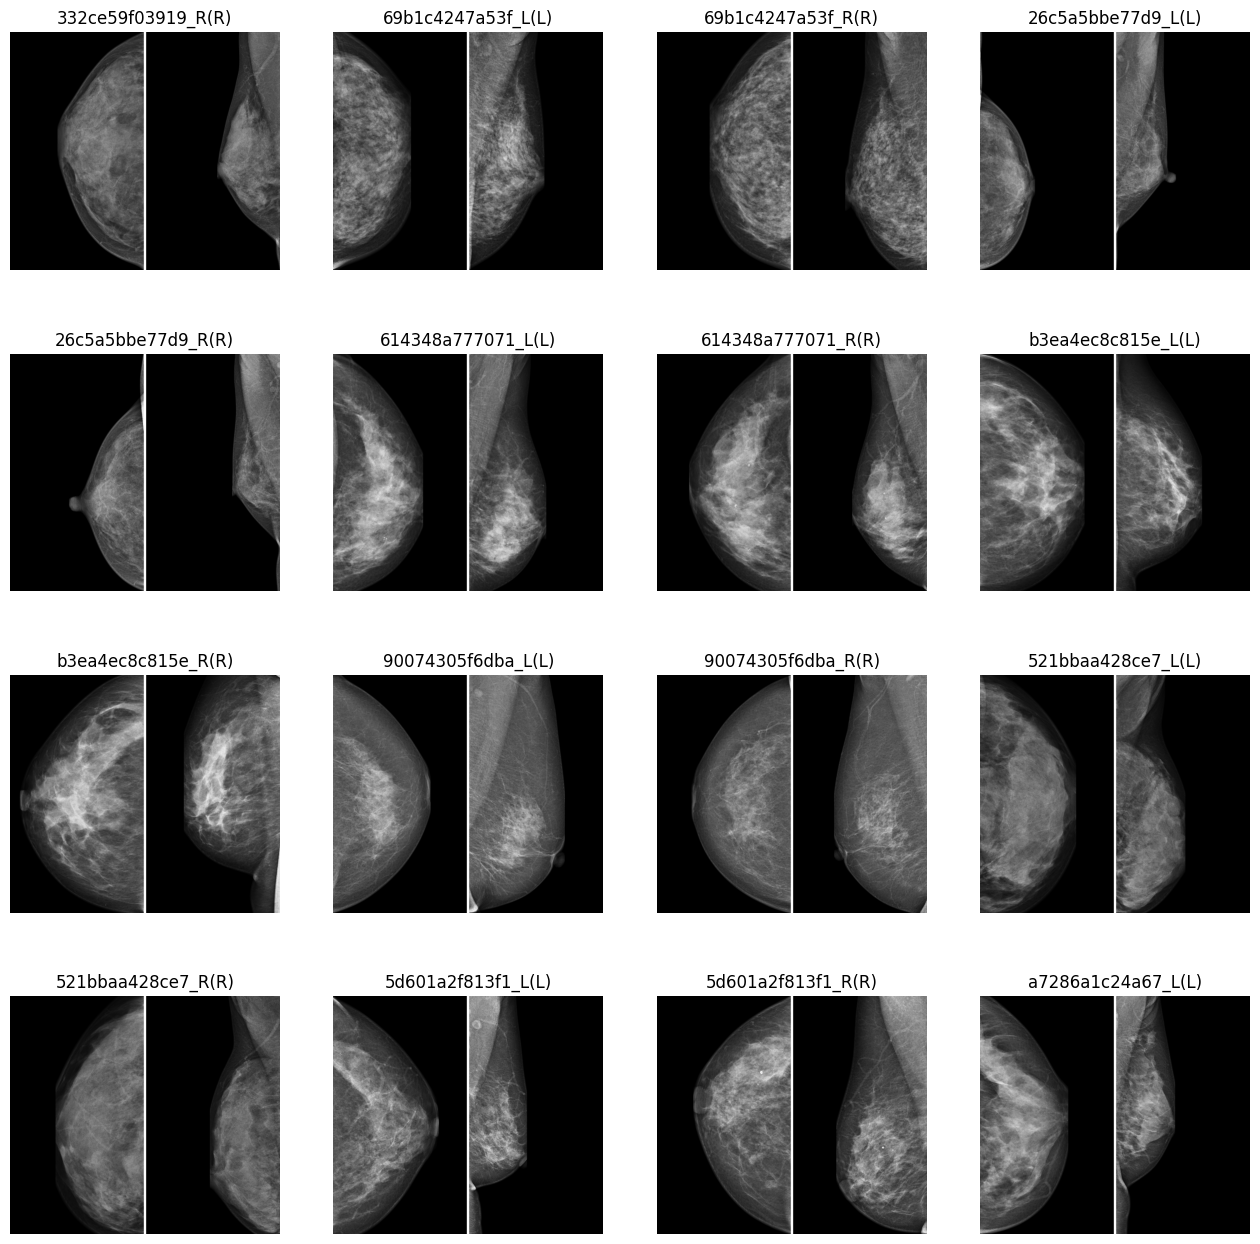

In [10]:
ncol = 4
nrow = 4
bar_color = [255]
bar_thickness = 5
bar = np.array([bar_color * bar_thickness]*D.resize[1])
random_index = np.random.randint(0,(len(ds)-ncol*nrow))
plt.figure(figsize=(4*ncol, 4*nrow))
for i in range(nrow*ncol):
    _id0, image_path_cc, zipfile_path_cc = ds.loc[random_index+i, ["pair_id","image_path_CC","zip_file_CC"]]
    img_cc, lat0 = load_dicom_from_zip(image_path_cc, zipfile_path_cc, return_laterality=True)
    _id1, image_path_mlo, zipfile_path_mlo = ds.loc[random_index+i, ["pair_id","image_path_MLO","zip_file_MLO"]]
    img_mlo, lat1 = load_dicom_from_zip(image_path_mlo, zipfile_path_mlo, return_laterality=True)
    img = np.hstack((img_cc,bar,img_mlo))
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(img, cmap='gray')
    if len(_id0) > 15:
        _id0 = _id0[-15:]
    plt.title(f"{_id0}({lat0})")
    plt.axis("off")
plt.show()

# Convert DICOM to PNG images

In [11]:
import os
import multiprocessing as mp
from tqdm.auto import tqdm

base_dir = ""
cardinality = 999999999999 

def load_and_save(row):
    global base_dir
    index, row = row
    lats = {}
    for view in ["CC", "MLO"]:
        filename = os.path.join(base_dir, f"{row['pair_id']}-{view}.png")
        if os.path.exists(filename):
            lats[view] = ""
            continue
        zipfile_path = row[f'zip_file_{view}']
        image_path = row[f'image_path_{view}']
        img_data, lat = load_dicom_from_zip(image_path, zipfile_path, return_laterality=True)
        cv2.imwrite(filename, img_data)
        lats[view] = lat
    if not lats['CC'] == lats['MLO']:
        return index+1
    return 0

def convert_dicoms_to_pngs(folder_name, kfold_ds):
    global base_dir
    base_dir = f'/kaggle/working/{folder_name}'
    print("saving PNG images to", base_dir)
    os.makedirs(base_dir, exist_ok=True)
    # start process
    with mp.Pool(mp.cpu_count()) as p:
        iterrows = list(kfold_ds.iterrows())[:cardinality]
        image_generator = tqdm(
            p.imap_unordered(load_and_save, iterrows),
            total=len(iterrows),
            desc="converting images"
        )
        r = list(image_generator)
        sumr = sum(r)
        print(sum(r))
        if sumr > 0:
            for idx in r:
                if idx > 0:
                    print(idx-1)

print("creating images dataset".center(50, "."))
convert_dicoms_to_pngs("images", ds)

.............creating images dataset..............
saving PNG images to /kaggle/working/images


/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


converting images:   0%|          | 0/2689 [00:00<?, ?it/s]

converting images:   0%|          | 1/2689 [00:01<55:46,  1.25s/it]

converting images:   0%|          | 4/2689 [00:01<12:53,  3.47it/s]

converting images:   0%|          | 9/2689 [00:01<05:43,  7.81it/s]

converting images:   1%|          | 17/2689 [00:01<02:37, 17.02it/s]

converting images:   1%|          | 22/2689 [00:01<02:01, 22.03it/s]

converting images:   1%|▏         | 35/2689 [00:01<01:05, 40.57it/s]

converting images:   2%|▏         | 58/2689 [00:02<00:33, 78.61it/s]

converting images:   3%|▎         | 86/2689 [00:02<00:21, 122.58it/s]

converting images:   4%|▍         | 103/2689 [00:03<00:58, 44.29it/s]

converting images:   4%|▍         | 116/2689 [00:03<01:02, 41.21it/s]

converting images:   5%|▍         | 126/2689 [00:03<00:57, 44.57it/s]

converting images:   5%|▌         | 141/2689 [00:03<00:45, 56.52it/s]

converting images:   6%|▌         | 152/2689 [00:03<00:39, 64.08it/s]

converting images:   6%|▋         | 170/2689 [00:03<00:30, 82.76it/s]

converting images:   7%|▋         | 184/2689 [00:04<00:27, 91.82it/s]

converting images:   7%|▋         | 197/2689 [00:04<01:03, 39.34it/s]

converting images:   8%|▊         | 207/2689 [00:05<01:02, 40.00it/s]

converting images:   8%|▊         | 216/2689 [00:05<00:55, 44.74it/s]

converting images:   8%|▊         | 228/2689 [00:05<00:44, 55.05it/s]

converting images:   9%|▉         | 237/2689 [00:05<00:43, 56.18it/s]

converting images:   9%|▉         | 245/2689 [00:05<00:44, 54.35it/s]

converting images:   9%|▉         | 254/2689 [00:05<00:40, 60.57it/s]

converting images:  10%|▉         | 268/2689 [00:05<00:32, 74.00it/s]

converting images:  10%|█         | 281/2689 [00:06<00:28, 84.85it/s]

converting images:  11%|█         | 291/2689 [00:06<00:51, 46.85it/s]

converting images:  11%|█         | 299/2689 [00:06<01:04, 37.21it/s]

converting images:  11%|█▏        | 307/2689 [00:06<00:55, 42.58it/s]

converting images:  12%|█▏        | 317/2689 [00:07<00:46, 51.50it/s]

converting images:  12%|█▏        | 327/2689 [00:07<00:39, 60.34it/s]

converting images:  12%|█▏        | 336/2689 [00:07<00:45, 52.01it/s]

converting images:  13%|█▎        | 343/2689 [00:07<00:46, 50.64it/s]

converting images:  13%|█▎        | 351/2689 [00:07<00:41, 56.26it/s]

converting images:  13%|█▎        | 359/2689 [00:07<00:38, 60.66it/s]

converting images:  14%|█▎        | 368/2689 [00:07<00:34, 67.06it/s]

converting images:  14%|█▍        | 378/2689 [00:07<00:30, 75.07it/s]

converting images:  14%|█▍        | 387/2689 [00:08<00:41, 55.36it/s]

converting images:  15%|█▍        | 394/2689 [00:08<00:59, 38.87it/s]

converting images:  15%|█▍        | 400/2689 [00:08<00:59, 38.39it/s]

converting images:  15%|█▌        | 409/2689 [00:08<00:48, 47.49it/s]

converting images:  16%|█▌        | 420/2689 [00:08<00:38, 58.64it/s]

converting images:  16%|█▌        | 428/2689 [00:09<00:44, 50.68it/s]

converting images:  16%|█▋        | 437/2689 [00:09<00:42, 53.34it/s]

converting images:  17%|█▋        | 447/2689 [00:09<00:35, 62.98it/s]

converting images:  17%|█▋        | 455/2689 [00:09<00:36, 61.24it/s]

converting images:  17%|█▋        | 466/2689 [00:09<00:32, 67.98it/s]

converting images:  18%|█▊        | 474/2689 [00:09<00:33, 65.25it/s]

converting images:  18%|█▊        | 481/2689 [00:09<00:34, 63.09it/s]

converting images:  18%|█▊        | 488/2689 [00:10<00:41, 52.48it/s]

converting images:  18%|█▊        | 494/2689 [00:10<00:56, 39.03it/s]

converting images:  19%|█▊        | 500/2689 [00:10<00:52, 41.70it/s]

converting images:  19%|█▉        | 508/2689 [00:10<00:44, 48.86it/s]

converting images:  19%|█▉        | 514/2689 [00:10<00:43, 50.39it/s]

converting images:  19%|█▉        | 520/2689 [00:10<00:42, 51.02it/s]

converting images:  20%|█▉        | 530/2689 [00:10<00:34, 62.64it/s]

converting images:  20%|█▉        | 537/2689 [00:11<00:46, 46.66it/s]

converting images:  20%|██        | 543/2689 [00:11<00:47, 45.61it/s]

converting images:  20%|██        | 551/2689 [00:11<00:41, 51.37it/s]

converting images:  21%|██        | 564/2689 [00:11<00:31, 67.84it/s]

converting images:  21%|██▏       | 573/2689 [00:11<00:28, 72.97it/s]

converting images:  22%|██▏       | 583/2689 [00:11<00:26, 79.73it/s]

converting images:  22%|██▏       | 592/2689 [00:12<00:44, 47.38it/s]

converting images:  22%|██▏       | 599/2689 [00:12<00:52, 39.95it/s]

converting images:  23%|██▎       | 608/2689 [00:12<00:43, 47.68it/s]

converting images:  23%|██▎       | 615/2689 [00:12<00:41, 50.35it/s]

converting images:  23%|██▎       | 626/2689 [00:12<00:35, 58.68it/s]

converting images:  24%|██▎       | 633/2689 [00:13<00:45, 45.16it/s]

converting images:  24%|██▍       | 639/2689 [00:13<00:43, 47.56it/s]

converting images:  24%|██▍       | 646/2689 [00:13<00:40, 50.94it/s]

converting images:  24%|██▍       | 657/2689 [00:13<00:34, 59.33it/s]

converting images:  25%|██▍       | 671/2689 [00:13<00:26, 76.52it/s]

converting images:  25%|██▌       | 681/2689 [00:13<00:25, 77.61it/s]

converting images:  26%|██▌       | 690/2689 [00:13<00:34, 57.61it/s]

converting images:  26%|██▌       | 697/2689 [00:14<00:52, 37.62it/s]

converting images:  26%|██▋       | 706/2689 [00:14<00:44, 45.00it/s]

converting images:  27%|██▋       | 713/2689 [00:14<00:40, 48.58it/s]

converting images:  27%|██▋       | 720/2689 [00:14<00:39, 49.72it/s]

converting images:  27%|██▋       | 727/2689 [00:14<00:41, 47.62it/s]

converting images:  27%|██▋       | 733/2689 [00:14<00:39, 49.55it/s]

converting images:  27%|██▋       | 739/2689 [00:15<00:42, 46.37it/s]

converting images:  28%|██▊       | 748/2689 [00:15<00:35, 54.05it/s]

converting images:  28%|██▊       | 758/2689 [00:15<00:33, 58.45it/s]

converting images:  29%|██▊       | 770/2689 [00:15<00:28, 66.62it/s]

converting images:  29%|██▉       | 777/2689 [00:15<00:30, 63.14it/s]

converting images:  29%|██▉       | 784/2689 [00:15<00:31, 60.46it/s]

converting images:  29%|██▉       | 791/2689 [00:15<00:41, 45.32it/s]

converting images:  30%|██▉       | 797/2689 [00:16<00:41, 45.65it/s]

converting images:  30%|██▉       | 804/2689 [00:16<00:37, 49.85it/s]

converting images:  30%|███       | 811/2689 [00:16<00:35, 52.30it/s]

converting images:  30%|███       | 817/2689 [00:16<00:40, 46.14it/s]

converting images:  31%|███       | 822/2689 [00:16<00:40, 46.44it/s]

converting images:  31%|███       | 829/2689 [00:16<00:37, 49.56it/s]

converting images:  31%|███       | 835/2689 [00:16<00:40, 45.93it/s]

converting images:  31%|███       | 840/2689 [00:16<00:40, 46.02it/s]

converting images:  31%|███▏      | 847/2689 [00:17<00:36, 50.53it/s]

converting images:  32%|███▏      | 856/2689 [00:17<00:30, 59.95it/s]

converting images:  32%|███▏      | 864/2689 [00:17<00:28, 63.18it/s]

converting images:  32%|███▏      | 871/2689 [00:17<00:28, 63.54it/s]

converting images:  33%|███▎      | 878/2689 [00:17<00:29, 62.06it/s]

converting images:  33%|███▎      | 885/2689 [00:17<00:33, 53.86it/s]

converting images:  33%|███▎      | 891/2689 [00:17<00:42, 42.47it/s]

converting images:  33%|███▎      | 897/2689 [00:18<00:40, 44.51it/s]

converting images:  34%|███▎      | 903/2689 [00:18<00:43, 41.41it/s]

converting images:  34%|███▍      | 909/2689 [00:18<00:39, 45.39it/s]

converting images:  34%|███▍      | 914/2689 [00:18<00:43, 41.07it/s]

converting images:  34%|███▍      | 920/2689 [00:18<00:41, 42.30it/s]

converting images:  34%|███▍      | 927/2689 [00:18<00:37, 47.12it/s]

converting images:  35%|███▍      | 932/2689 [00:18<00:38, 45.31it/s]

converting images:  35%|███▌      | 943/2689 [00:18<00:29, 58.58it/s]

converting images:  35%|███▌      | 953/2689 [00:19<00:25, 67.88it/s]

converting images:  36%|███▌      | 963/2689 [00:19<00:23, 73.21it/s]

converting images:  36%|███▌      | 971/2689 [00:19<00:28, 61.19it/s]

converting images:  36%|███▋      | 978/2689 [00:19<00:37, 45.26it/s]

converting images:  37%|███▋      | 984/2689 [00:19<00:41, 40.71it/s]

converting images:  37%|███▋      | 990/2689 [00:19<00:38, 43.67it/s]

converting images:  37%|███▋      | 997/2689 [00:20<00:34, 48.37it/s]

converting images:  37%|███▋      | 1003/2689 [00:20<00:35, 48.10it/s]

converting images:  38%|███▊      | 1009/2689 [00:20<00:33, 49.84it/s]

converting images:  38%|███▊      | 1018/2689 [00:20<00:30, 55.15it/s]

converting images:  38%|███▊      | 1024/2689 [00:20<00:37, 43.90it/s]

converting images:  38%|███▊      | 1029/2689 [00:20<00:39, 41.61it/s]

converting images:  39%|███▊      | 1038/2689 [00:20<00:32, 50.44it/s]

converting images:  39%|███▉      | 1048/2689 [00:21<00:26, 61.90it/s]

converting images:  39%|███▉      | 1055/2689 [00:21<00:27, 59.45it/s]

converting images:  40%|███▉      | 1066/2689 [00:21<00:25, 64.84it/s]

converting images:  40%|███▉      | 1073/2689 [00:21<00:30, 53.08it/s]

converting images:  40%|████      | 1079/2689 [00:21<00:43, 36.61it/s]

converting images:  40%|████      | 1084/2689 [00:21<00:42, 37.47it/s]

converting images:  41%|████      | 1090/2689 [00:22<00:40, 39.44it/s]

converting images:  41%|████      | 1101/2689 [00:22<00:29, 53.52it/s]

converting images:  41%|████▏     | 1114/2689 [00:22<00:24, 63.64it/s]

converting images:  42%|████▏     | 1122/2689 [00:22<00:24, 64.31it/s]

converting images:  42%|████▏     | 1129/2689 [00:22<00:28, 55.14it/s]

converting images:  42%|████▏     | 1135/2689 [00:22<00:32, 48.49it/s]

converting images:  42%|████▏     | 1142/2689 [00:22<00:29, 52.60it/s]

converting images:  43%|████▎     | 1149/2689 [00:22<00:27, 56.62it/s]

converting images:  43%|████▎     | 1157/2689 [00:23<00:25, 60.86it/s]

converting images:  43%|████▎     | 1165/2689 [00:23<00:24, 63.32it/s]

converting images:  44%|████▎     | 1172/2689 [00:23<00:29, 51.28it/s]

converting images:  44%|████▍     | 1178/2689 [00:23<00:38, 39.52it/s]

converting images:  44%|████▍     | 1183/2689 [00:23<00:37, 40.57it/s]

converting images:  44%|████▍     | 1189/2689 [00:23<00:34, 44.10it/s]

converting images:  44%|████▍     | 1196/2689 [00:24<00:30, 48.29it/s]

converting images:  45%|████▍     | 1206/2689 [00:24<00:24, 59.53it/s]

converting images:  45%|████▌     | 1213/2689 [00:24<00:28, 51.48it/s]

converting images:  45%|████▌     | 1219/2689 [00:24<00:28, 51.81it/s]

converting images:  46%|████▌     | 1225/2689 [00:24<00:28, 51.55it/s]

converting images:  46%|████▌     | 1231/2689 [00:24<00:30, 47.98it/s]

converting images:  46%|████▌     | 1238/2689 [00:24<00:29, 49.25it/s]

converting images:  46%|████▋     | 1245/2689 [00:24<00:27, 53.13it/s]

converting images:  47%|████▋     | 1255/2689 [00:25<00:22, 62.97it/s]

converting images:  47%|████▋     | 1262/2689 [00:25<00:27, 52.26it/s]

converting images:  47%|████▋     | 1268/2689 [00:25<00:33, 42.49it/s]

converting images:  47%|████▋     | 1273/2689 [00:25<00:35, 40.05it/s]

converting images:  48%|████▊     | 1278/2689 [00:25<00:34, 41.50it/s]

converting images:  48%|████▊     | 1286/2689 [00:25<00:28, 48.61it/s]

converting images:  48%|████▊     | 1297/2689 [00:25<00:22, 62.21it/s]

converting images:  48%|████▊     | 1304/2689 [00:26<00:22, 62.88it/s]

converting images:  49%|████▉     | 1311/2689 [00:26<00:26, 52.18it/s]

converting images:  49%|████▉     | 1317/2689 [00:26<00:27, 50.24it/s]

converting images:  49%|████▉     | 1326/2689 [00:26<00:23, 59.02it/s]

converting images:  50%|████▉     | 1333/2689 [00:26<00:23, 56.66it/s]

converting images:  50%|████▉     | 1339/2689 [00:26<00:30, 44.73it/s]

converting images:  50%|█████     | 1352/2689 [00:26<00:22, 60.76it/s]

converting images:  51%|█████     | 1359/2689 [00:27<00:22, 57.95it/s]

converting images:  51%|█████     | 1366/2689 [00:27<00:25, 52.19it/s]

converting images:  51%|█████     | 1372/2689 [00:27<00:29, 44.73it/s]

converting images:  51%|█████     | 1377/2689 [00:27<00:29, 44.30it/s]

converting images:  51%|█████▏    | 1384/2689 [00:27<00:26, 48.94it/s]

converting images:  52%|█████▏    | 1390/2689 [00:27<00:26, 49.34it/s]

converting images:  52%|█████▏    | 1396/2689 [00:27<00:25, 50.42it/s]

converting images:  52%|█████▏    | 1405/2689 [00:28<00:21, 58.89it/s]

converting images:  53%|█████▎    | 1412/2689 [00:28<00:24, 52.51it/s]

converting images:  53%|█████▎    | 1423/2689 [00:28<00:21, 59.72it/s]

converting images:  53%|█████▎    | 1432/2689 [00:28<00:20, 60.98it/s]

converting images:  54%|█████▎    | 1439/2689 [00:28<00:20, 62.07it/s]

converting images:  54%|█████▍    | 1446/2689 [00:28<00:20, 61.79it/s]

converting images:  54%|█████▍    | 1453/2689 [00:28<00:21, 58.65it/s]

converting images:  54%|█████▍    | 1459/2689 [00:28<00:22, 55.75it/s]

converting images:  54%|█████▍    | 1465/2689 [00:29<00:25, 48.03it/s]

converting images:  55%|█████▍    | 1473/2689 [00:29<00:22, 55.09it/s]

converting images:  55%|█████▌    | 1479/2689 [00:29<00:28, 42.82it/s]

converting images:  55%|█████▌    | 1484/2689 [00:29<00:27, 44.20it/s]

converting images:  56%|█████▌    | 1494/2689 [00:29<00:21, 56.10it/s]

converting images:  56%|█████▌    | 1501/2689 [00:29<00:21, 54.65it/s]

converting images:  56%|█████▌    | 1509/2689 [00:29<00:24, 48.61it/s]

converting images:  56%|█████▋    | 1515/2689 [00:30<00:24, 47.68it/s]

converting images:  57%|█████▋    | 1521/2689 [00:30<00:31, 37.49it/s]

converting images:  57%|█████▋    | 1528/2689 [00:30<00:37, 31.10it/s]

converting images:  57%|█████▋    | 1532/2689 [00:30<00:38, 29.95it/s]

converting images:  57%|█████▋    | 1536/2689 [00:30<00:38, 30.05it/s]

converting images:  57%|█████▋    | 1540/2689 [00:31<00:39, 28.87it/s]

converting images:  57%|█████▋    | 1544/2689 [00:31<00:38, 29.77it/s]

converting images:  58%|█████▊    | 1548/2689 [00:31<00:40, 27.91it/s]

converting images:  58%|█████▊    | 1552/2689 [00:31<00:38, 29.34it/s]

converting images:  58%|█████▊    | 1556/2689 [00:31<00:37, 29.89it/s]

converting images:  58%|█████▊    | 1560/2689 [00:31<00:42, 26.76it/s]

converting images:  58%|█████▊    | 1565/2689 [00:31<00:35, 31.52it/s]

converting images:  58%|█████▊    | 1572/2689 [00:32<00:27, 40.29it/s]

converting images:  59%|█████▊    | 1577/2689 [00:32<00:37, 29.97it/s]

converting images:  59%|█████▉    | 1584/2689 [00:32<00:29, 37.57it/s]

converting images:  59%|█████▉    | 1589/2689 [00:32<00:31, 34.42it/s]

converting images:  59%|█████▉    | 1594/2689 [00:32<00:33, 32.69it/s]

converting images:  59%|█████▉    | 1599/2689 [00:32<00:30, 35.92it/s]

converting images:  60%|█████▉    | 1606/2689 [00:33<00:26, 41.63it/s]

converting images:  60%|█████▉    | 1611/2689 [00:33<00:37, 29.08it/s]

converting images:  60%|██████    | 1615/2689 [00:33<00:35, 30.32it/s]

converting images:  60%|██████    | 1621/2689 [00:33<00:32, 32.39it/s]

converting images:  60%|██████    | 1625/2689 [00:33<00:38, 27.42it/s]

converting images:  61%|██████    | 1630/2689 [00:33<00:34, 30.88it/s]

converting images:  61%|██████    | 1634/2689 [00:34<00:34, 30.45it/s]

converting images:  61%|██████    | 1638/2689 [00:34<00:34, 30.27it/s]

converting images:  61%|██████    | 1642/2689 [00:34<00:32, 31.97it/s]

converting images:  61%|██████    | 1646/2689 [00:34<00:43, 23.80it/s]

converting images:  61%|██████▏   | 1650/2689 [00:34<00:44, 23.55it/s]

converting images:  61%|██████▏   | 1653/2689 [00:34<00:46, 22.07it/s]

converting images:  62%|██████▏   | 1658/2689 [00:35<00:38, 27.08it/s]

converting images:  62%|██████▏   | 1662/2689 [00:35<00:35, 28.58it/s]

converting images:  62%|██████▏   | 1671/2689 [00:35<00:24, 42.09it/s]

converting images:  62%|██████▏   | 1676/2689 [00:35<00:30, 33.07it/s]

converting images:  62%|██████▏   | 1680/2689 [00:35<00:30, 32.55it/s]

converting images:  63%|██████▎   | 1684/2689 [00:35<00:34, 29.08it/s]

converting images:  63%|██████▎   | 1689/2689 [00:35<00:31, 32.21it/s]

converting images:  63%|██████▎   | 1699/2689 [00:36<00:24, 41.03it/s]

converting images:  63%|██████▎   | 1705/2689 [00:36<00:25, 39.24it/s]

converting images:  64%|██████▎   | 1710/2689 [00:36<00:25, 37.95it/s]

converting images:  64%|██████▍   | 1715/2689 [00:36<00:26, 36.30it/s]

converting images:  64%|██████▍   | 1719/2689 [00:36<00:28, 33.77it/s]

converting images:  64%|██████▍   | 1723/2689 [00:36<00:33, 28.44it/s]

converting images:  64%|██████▍   | 1726/2689 [00:37<00:36, 26.30it/s]

converting images:  64%|██████▍   | 1730/2689 [00:37<00:33, 28.88it/s]

converting images:  64%|██████▍   | 1734/2689 [00:37<00:33, 28.48it/s]

converting images:  65%|██████▍   | 1737/2689 [00:37<00:38, 24.95it/s]

converting images:  65%|██████▍   | 1740/2689 [00:37<00:41, 23.13it/s]

converting images:  65%|██████▍   | 1743/2689 [00:37<00:41, 22.79it/s]

converting images:  65%|██████▌   | 1748/2689 [00:37<00:39, 23.75it/s]

converting images:  65%|██████▌   | 1755/2689 [00:38<00:28, 32.75it/s]

converting images:  65%|██████▌   | 1759/2689 [00:38<00:33, 27.44it/s]

converting images:  66%|██████▌   | 1763/2689 [00:38<00:31, 29.15it/s]

converting images:  66%|██████▌   | 1767/2689 [00:38<00:31, 29.05it/s]

converting images:  66%|██████▌   | 1772/2689 [00:38<00:28, 32.68it/s]

converting images:  66%|██████▌   | 1778/2689 [00:38<00:23, 38.58it/s]

converting images:  66%|██████▋   | 1783/2689 [00:38<00:26, 33.65it/s]

converting images:  67%|██████▋   | 1789/2689 [00:39<00:26, 34.37it/s]

converting images:  67%|██████▋   | 1793/2689 [00:39<00:39, 22.73it/s]

converting images:  67%|██████▋   | 1798/2689 [00:39<00:35, 25.41it/s]

converting images:  67%|██████▋   | 1802/2689 [00:39<00:34, 25.44it/s]

converting images:  67%|██████▋   | 1806/2689 [00:39<00:31, 28.11it/s]

converting images:  67%|██████▋   | 1810/2689 [00:40<00:34, 25.63it/s]

converting images:  67%|██████▋   | 1815/2689 [00:40<00:29, 29.62it/s]

converting images:  68%|██████▊   | 1825/2689 [00:40<00:19, 43.49it/s]

converting images:  68%|██████▊   | 1830/2689 [00:40<00:22, 38.40it/s]

converting images:  68%|██████▊   | 1836/2689 [00:40<00:20, 41.96it/s]

converting images:  68%|██████▊   | 1841/2689 [00:40<00:21, 39.62it/s]

converting images:  69%|██████▊   | 1846/2689 [00:40<00:25, 32.96it/s]

converting images:  69%|██████▉   | 1851/2689 [00:41<00:24, 34.42it/s]

converting images:  69%|██████▉   | 1855/2689 [00:41<00:28, 29.40it/s]

converting images:  69%|██████▉   | 1859/2689 [00:41<00:29, 27.89it/s]

converting images:  69%|██████▉   | 1862/2689 [00:41<00:37, 22.19it/s]

converting images:  69%|██████▉   | 1865/2689 [00:41<00:36, 22.76it/s]

converting images:  70%|██████▉   | 1870/2689 [00:41<00:32, 25.05it/s]

converting images:  70%|██████▉   | 1875/2689 [00:42<00:30, 26.78it/s]

converting images:  70%|██████▉   | 1879/2689 [00:42<00:29, 27.06it/s]

converting images:  70%|███████   | 1883/2689 [00:42<00:28, 28.41it/s]

converting images:  70%|███████   | 1890/2689 [00:42<00:23, 34.10it/s]

converting images:  70%|███████   | 1895/2689 [00:42<00:24, 31.89it/s]

converting images:  71%|███████   | 1902/2689 [00:42<00:21, 36.06it/s]

converting images:  71%|███████   | 1907/2689 [00:42<00:20, 38.55it/s]

converting images:  71%|███████   | 1914/2689 [00:43<00:17, 43.09it/s]

converting images:  71%|███████▏  | 1919/2689 [00:43<00:19, 40.51it/s]

converting images:  72%|███████▏  | 1924/2689 [00:43<00:20, 37.33it/s]

converting images:  72%|███████▏  | 1928/2689 [00:43<00:23, 32.13it/s]

converting images:  72%|███████▏  | 1932/2689 [00:43<00:26, 28.04it/s]

converting images:  72%|███████▏  | 1936/2689 [00:43<00:26, 28.40it/s]

converting images:  72%|███████▏  | 1940/2689 [00:44<00:31, 23.66it/s]

converting images:  72%|███████▏  | 1944/2689 [00:44<00:27, 26.63it/s]

converting images:  72%|███████▏  | 1947/2689 [00:44<00:28, 26.35it/s]

converting images:  73%|███████▎  | 1953/2689 [00:44<00:23, 31.61it/s]

converting images:  73%|███████▎  | 1957/2689 [00:44<00:25, 29.08it/s]

converting images:  73%|███████▎  | 1961/2689 [00:44<00:25, 28.23it/s]

converting images:  73%|███████▎  | 1964/2689 [00:44<00:26, 27.36it/s]

converting images:  73%|███████▎  | 1973/2689 [00:45<00:18, 39.08it/s]

converting images:  74%|███████▎  | 1980/2689 [00:45<00:16, 43.50it/s]

converting images:  74%|███████▍  | 1985/2689 [00:45<00:16, 43.66it/s]

converting images:  74%|███████▍  | 1990/2689 [00:45<00:16, 42.72it/s]

converting images:  74%|███████▍  | 1996/2689 [00:45<00:16, 41.27it/s]

converting images:  75%|███████▍  | 2006/2689 [00:45<00:14, 45.58it/s]

converting images:  75%|███████▍  | 2012/2689 [00:45<00:14, 47.59it/s]

converting images:  75%|███████▌  | 2017/2689 [00:46<00:16, 39.73it/s]

converting images:  75%|███████▌  | 2022/2689 [00:46<00:18, 37.02it/s]

converting images:  75%|███████▌  | 2027/2689 [00:46<00:19, 33.20it/s]

converting images:  76%|███████▌  | 2031/2689 [00:46<00:25, 25.82it/s]

converting images:  76%|███████▌  | 2038/2689 [00:46<00:19, 33.63it/s]

converting images:  76%|███████▌  | 2043/2689 [00:46<00:19, 33.44it/s]

converting images:  76%|███████▌  | 2047/2689 [00:47<00:19, 32.65it/s]

converting images:  76%|███████▋  | 2051/2689 [00:47<00:19, 32.18it/s]

converting images:  76%|███████▋  | 2057/2689 [00:47<00:16, 37.25it/s]

converting images:  77%|███████▋  | 2061/2689 [00:47<00:20, 30.80it/s]

converting images:  77%|███████▋  | 2068/2689 [00:47<00:20, 30.46it/s]

converting images:  77%|███████▋  | 2072/2689 [00:47<00:19, 31.03it/s]

converting images:  77%|███████▋  | 2076/2689 [00:48<00:25, 23.83it/s]

converting images:  77%|███████▋  | 2083/2689 [00:48<00:19, 30.56it/s]

converting images:  78%|███████▊  | 2088/2689 [00:48<00:17, 34.11it/s]

converting images:  78%|███████▊  | 2092/2689 [00:48<00:19, 30.16it/s]

converting images:  78%|███████▊  | 2096/2689 [00:48<00:20, 29.23it/s]

converting images:  78%|███████▊  | 2100/2689 [00:48<00:18, 31.02it/s]

converting images:  78%|███████▊  | 2104/2689 [00:49<00:22, 25.49it/s]

converting images:  78%|███████▊  | 2107/2689 [00:49<00:25, 23.14it/s]

converting images:  78%|███████▊  | 2110/2689 [00:49<00:24, 23.99it/s]

converting images:  79%|███████▊  | 2114/2689 [00:49<00:22, 25.94it/s]

converting images:  79%|███████▉  | 2119/2689 [00:49<00:18, 30.26it/s]

converting images:  79%|███████▉  | 2123/2689 [00:49<00:17, 32.57it/s]

converting images:  79%|███████▉  | 2128/2689 [00:49<00:16, 34.43it/s]

converting images:  79%|███████▉  | 2132/2689 [00:49<00:15, 35.62it/s]

converting images:  79%|███████▉  | 2136/2689 [00:50<00:16, 33.40it/s]

converting images:  80%|███████▉  | 2140/2689 [00:50<00:15, 34.67it/s]

converting images:  80%|███████▉  | 2144/2689 [00:50<00:21, 25.81it/s]

converting images:  80%|███████▉  | 2151/2689 [00:50<00:16, 33.05it/s]

converting images:  80%|████████  | 2155/2689 [00:50<00:17, 30.98it/s]

converting images:  80%|████████  | 2160/2689 [00:50<00:15, 35.14it/s]

converting images:  80%|████████  | 2164/2689 [00:50<00:14, 35.93it/s]

converting images:  81%|████████  | 2168/2689 [00:51<00:14, 35.40it/s]

converting images:  81%|████████  | 2173/2689 [00:51<00:15, 32.57it/s]

converting images:  81%|████████  | 2177/2689 [00:51<00:15, 33.21it/s]

converting images:  81%|████████  | 2184/2689 [00:51<00:12, 41.81it/s]

converting images:  81%|████████▏ | 2189/2689 [00:51<00:13, 36.48it/s]

converting images:  82%|████████▏ | 2194/2689 [00:51<00:15, 31.59it/s]

converting images:  82%|████████▏ | 2198/2689 [00:51<00:14, 32.96it/s]

converting images:  82%|████████▏ | 2202/2689 [00:52<00:14, 32.49it/s]

converting images:  82%|████████▏ | 2208/2689 [00:52<00:14, 33.03it/s]

converting images:  82%|████████▏ | 2212/2689 [00:52<00:16, 28.18it/s]

converting images:  82%|████████▏ | 2216/2689 [00:52<00:15, 30.39it/s]

converting images:  83%|████████▎ | 2226/2689 [00:52<00:10, 42.48it/s]

converting images:  83%|████████▎ | 2231/2689 [00:52<00:12, 38.16it/s]

converting images:  83%|████████▎ | 2236/2689 [00:53<00:13, 34.08it/s]

converting images:  83%|████████▎ | 2241/2689 [00:53<00:12, 37.22it/s]

converting images:  83%|████████▎ | 2245/2689 [00:53<00:12, 36.58it/s]

converting images:  84%|████████▎ | 2249/2689 [00:53<00:16, 26.62it/s]

converting images:  84%|████████▍ | 2253/2689 [00:53<00:16, 26.19it/s]

converting images:  84%|████████▍ | 2257/2689 [00:53<00:16, 26.17it/s]

converting images:  84%|████████▍ | 2262/2689 [00:54<00:15, 27.18it/s]

converting images:  84%|████████▍ | 2269/2689 [00:54<00:12, 33.63it/s]

converting images:  85%|████████▍ | 2275/2689 [00:54<00:10, 38.35it/s]

converting images:  85%|████████▍ | 2280/2689 [00:54<00:12, 32.42it/s]

converting images:  85%|████████▍ | 2284/2689 [00:54<00:12, 32.06it/s]

converting images:  85%|████████▌ | 2289/2689 [00:54<00:12, 32.07it/s]

converting images:  85%|████████▌ | 2293/2689 [00:54<00:11, 33.61it/s]

converting images:  85%|████████▌ | 2297/2689 [00:54<00:11, 33.60it/s]

converting images:  86%|████████▌ | 2301/2689 [00:55<00:12, 32.01it/s]

converting images:  86%|████████▌ | 2307/2689 [00:55<00:10, 37.94it/s]

converting images:  86%|████████▌ | 2311/2689 [00:55<00:14, 25.34it/s]

converting images:  86%|████████▌ | 2315/2689 [00:55<00:14, 25.95it/s]

converting images:  86%|████████▌ | 2319/2689 [00:55<00:16, 22.65it/s]

converting images:  86%|████████▋ | 2325/2689 [00:56<00:12, 28.82it/s]

converting images:  87%|████████▋ | 2329/2689 [00:56<00:12, 28.89it/s]

converting images:  87%|████████▋ | 2333/2689 [00:56<00:12, 28.66it/s]

converting images:  87%|████████▋ | 2337/2689 [00:56<00:11, 29.96it/s]

converting images:  87%|████████▋ | 2341/2689 [00:56<00:12, 27.65it/s]

converting images:  87%|████████▋ | 2345/2689 [00:56<00:12, 28.17it/s]

converting images:  87%|████████▋ | 2349/2689 [00:56<00:11, 30.16it/s]

converting images:  88%|████████▊ | 2354/2689 [00:56<00:10, 30.87it/s]

converting images:  88%|████████▊ | 2358/2689 [00:57<00:10, 30.53it/s]

converting images:  88%|████████▊ | 2365/2689 [00:57<00:08, 39.22it/s]

converting images:  88%|████████▊ | 2370/2689 [00:57<00:09, 34.64it/s]

converting images:  88%|████████▊ | 2374/2689 [00:57<00:10, 30.89it/s]

converting images:  89%|████████▊ | 2383/2689 [00:57<00:07, 40.73it/s]

converting images:  89%|████████▉ | 2390/2689 [00:57<00:06, 45.69it/s]

converting images:  89%|████████▉ | 2397/2689 [00:57<00:06, 46.95it/s]

converting images:  89%|████████▉ | 2402/2689 [00:58<00:09, 29.83it/s]

converting images:  90%|████████▉ | 2407/2689 [00:58<00:09, 30.45it/s]

converting images:  90%|████████▉ | 2411/2689 [00:58<00:08, 31.89it/s]

converting images:  90%|████████▉ | 2416/2689 [00:58<00:08, 33.06it/s]

converting images:  90%|████████▉ | 2420/2689 [00:58<00:08, 33.54it/s]

converting images:  90%|█████████ | 2424/2689 [00:59<00:09, 26.65it/s]

converting images:  90%|█████████ | 2428/2689 [00:59<00:10, 24.03it/s]

converting images:  90%|█████████ | 2432/2689 [00:59<00:10, 24.07it/s]

converting images:  91%|█████████ | 2436/2689 [00:59<00:09, 26.16it/s]

converting images:  91%|█████████ | 2439/2689 [00:59<00:09, 25.87it/s]

converting images:  91%|█████████ | 2442/2689 [00:59<00:09, 26.65it/s]

converting images:  91%|█████████ | 2448/2689 [00:59<00:06, 34.59it/s]

converting images:  91%|█████████ | 2452/2689 [01:00<00:07, 30.45it/s]

converting images:  91%|█████████▏| 2456/2689 [01:00<00:07, 29.17it/s]

converting images:  91%|█████████▏| 2460/2689 [01:00<00:07, 31.49it/s]

converting images:  92%|█████████▏| 2466/2689 [01:00<00:06, 35.38it/s]

converting images:  92%|█████████▏| 2472/2689 [01:00<00:05, 36.79it/s]

converting images:  92%|█████████▏| 2478/2689 [01:00<00:05, 40.86it/s]

converting images:  92%|█████████▏| 2483/2689 [01:00<00:05, 38.01it/s]

converting images:  93%|█████████▎| 2488/2689 [01:01<00:05, 37.44it/s]

converting images:  93%|█████████▎| 2493/2689 [01:01<00:04, 40.39it/s]

converting images:  93%|█████████▎| 2499/2689 [01:01<00:05, 36.35it/s]

converting images:  93%|█████████▎| 2508/2689 [01:01<00:04, 38.09it/s]

converting images:  93%|█████████▎| 2512/2689 [01:01<00:06, 27.99it/s]

converting images:  94%|█████████▎| 2519/2689 [01:01<00:05, 33.00it/s]

converting images:  94%|█████████▍| 2523/2689 [01:02<00:06, 24.05it/s]

converting images:  94%|█████████▍| 2530/2689 [01:02<00:05, 30.70it/s]

converting images:  94%|█████████▍| 2534/2689 [01:02<00:06, 24.99it/s]

converting images:  94%|█████████▍| 2538/2689 [01:02<00:06, 24.83it/s]

converting images:  95%|█████████▍| 2545/2689 [01:02<00:04, 30.59it/s]

converting images:  95%|█████████▍| 2549/2689 [01:03<00:04, 30.81it/s]

converting images:  95%|█████████▍| 2553/2689 [01:03<00:04, 27.24it/s]

converting images:  95%|█████████▌| 2559/2689 [01:03<00:04, 31.01it/s]

converting images:  95%|█████████▌| 2563/2689 [01:03<00:04, 28.58it/s]

converting images:  96%|█████████▌| 2569/2689 [01:03<00:03, 33.19it/s]

converting images:  96%|█████████▌| 2573/2689 [01:03<00:03, 32.78it/s]

converting images:  96%|█████████▌| 2577/2689 [01:04<00:03, 31.58it/s]

converting images:  96%|█████████▌| 2584/2689 [01:04<00:02, 39.44it/s]

converting images:  96%|█████████▋| 2589/2689 [01:04<00:03, 30.61it/s]

converting images:  97%|█████████▋| 2595/2689 [01:04<00:02, 33.92it/s]

converting images:  97%|█████████▋| 2600/2689 [01:04<00:02, 36.67it/s]

converting images:  97%|█████████▋| 2605/2689 [01:04<00:03, 27.76it/s]

converting images:  97%|█████████▋| 2609/2689 [01:05<00:03, 24.82it/s]

converting images:  97%|█████████▋| 2613/2689 [01:05<00:02, 27.45it/s]

converting images:  97%|█████████▋| 2619/2689 [01:05<00:02, 33.98it/s]

converting images:  98%|█████████▊| 2624/2689 [01:05<00:01, 34.67it/s]

converting images:  98%|█████████▊| 2630/2689 [01:05<00:01, 39.53it/s]

converting images:  98%|█████████▊| 2636/2689 [01:05<00:01, 41.20it/s]

converting images:  98%|█████████▊| 2641/2689 [01:05<00:01, 40.00it/s]

converting images:  98%|█████████▊| 2646/2689 [01:05<00:01, 41.87it/s]

converting images:  99%|█████████▊| 2653/2689 [01:06<00:00, 48.88it/s]

converting images:  99%|█████████▉| 2659/2689 [01:06<00:00, 49.85it/s]

converting images:  99%|█████████▉| 2667/2689 [01:06<00:00, 57.32it/s]

converting images:  99%|█████████▉| 2674/2689 [01:06<00:00, 59.55it/s]

converting images: 100%|█████████▉| 2681/2689 [01:06<00:00, 52.59it/s]

converting images: 100%|█████████▉| 2687/2689 [01:06<00:00, 33.73it/s]

converting images: 100%|██████████| 2689/2689 [01:07<00:00, 39.96it/s]

0


In [12]:
import os
import zipfile

base_dir = 'example_dicom'
!rm -rf {base_dir}
os.makedirs(base_dir, exist_ok=True)

def save_dicom(image_path, zipfile_path, save_filename):
    with zipfile.ZipFile(zipfile_path, "r") as zip_ref:
        with zip_ref.open(image_path) as f:
            image_bytes = f.read()
    with open(save_filename, "wb") as f:
        f.write(image_bytes)
    
n_data_to_save = 1
df_list = []
for key in index_label:
    if key == 0.0:
        continue
    biradn = ds.loc[ds.BI_RADS_MAX == key].sample(n_data_to_save)
    df_list.append(biradn)

sample_df = pd.concat(df_list, ignore_index=True)
for _, row in sample_df.iterrows():
    label = int(row['BI_RADS_MAX'])
    for view in ["CC", "MLO"]:
        save_filename = os.path.join(base_dir, f"birads_{label}_example_{view}.dicom")
        if os.path.exists(save_filename):
            continue
        zipfile_path = row[f'zip_file_{view}']
        image_path = row[f'image_path_{view}']
        save_dicom(image_path, zipfile_path, save_filename)
        
!tar -zcvf example_dicom_tar_gz {base_dir} && rm -rf {base_dir}

example_dicom/
example_dicom/birads_3_example_CC.dicom


example_dicom/birads_1_example_CC.dicom


example_dicom/birads_4_example_CC.dicom


example_dicom/birads_4_example_MLO.dicom


example_dicom/birads_5_example_CC.dicom


example_dicom/birads_3_example_MLO.dicom


example_dicom/birads_2_example_CC.dicom


example_dicom/birads_1_example_MLO.dicom


example_dicom/birads_2_example_MLO.dicom


example_dicom/birads_5_example_MLO.dicom


In [13]:
# import cv2
# import numpy as np
# import tensorflow as tf

# print(tf.__version__)

# im = cv2.imread("/kaggle/working/images/a235482f737d9a3baa8313c8f4db16d6_L-MLO.png")
# im = cv2.resize(im, (1024, 1024))
# # im = cv2.flip(im, 1)

# # interpreter = tf.lite.Interpreter("/kaggle/input/mammo-roi-detector/tflite/yolov5/1/best-fp16.tflite")
# # interpreter.allocate_tensors()
# # inputs = interpreter.get_input_details()[0]
# # output = interpreter.get_output_details()[0]
# # interpreter.set_tensor(inputs["index"], np.expand_dims(im, 0).astype("float32"))
# # interpreter.invoke()
# # o = interpreter.get_tensor(output["index"])
# # index, total_boxes = tf.image.non_max_suppression_padded(
# #     o[...,:4],
# #     o[...,4],
# #     1,
# #     iou_threshold=0.5,
# #     score_threshold=0.5,
# #     pad_to_max_output_size=True,
# # )
# # print(o[0, index[0]])

# import cv2

# def get_bbox_absolute_pixel(bbox, image_shape):
#     if not len(image_shape) == 3:
#         raise NotImplementedError("this function expect image shape with len == 3")
#     h, w, _ = image_shape
#     bbox = np.array(bbox)
#     if not len(bbox.shape) == 1:
#         raise NotImplementedError("this function expect bbox shape with len == 1")
#     bbox[[0,2]]*=w
#     bbox[[1,3]]*=h
#     bbox = bbox.astype(int)
#     return bbox

# def xywh2xyxy(bbox):
#     x0, y0, w, h = bbox
#     x1 = x0 + w
#     y1 = y0 + h
#     return x0, y0, x1, y1

# # bbox = get_bbox_absolute_pixel(o[0, index[0], :4][0], im.shape)
# # bbox = xywh2xyxy(bbox)
# bbox = np.array(crop_coords(np.mean(im, axis=-1)))
# bbox = xywh2xyxy(bbox)
# print(bbox)
# x_min, y_min, x_max, y_max = bbox
# img = cv2.rectangle(im.astype("uint8"), (x_min, y_min), (x_max, y_max), (255, 0, 0), 5)
# # img = im[y_min:y_max,x_min:x_max]

# sum_L = np.sum(img[:, :20])
# sum_R = np.sum(img[:, -20:])
# laterality = 'L' if sum_L > sum_R else 'R'
# print(laterality)
# plt.imshow(img)

In [14]:
# def get_label(file_path):
#     path_parts = tf.strings.split(file_path, os.path.sep)
#     filename_parts = tf.strings.split(path_parts[-1], "_")
#     label = tf.strings.to_number(filename_parts[-3],out_type=tf.dtypes.int32)

#     return tf.one_hot(label-1,5)

# def decode_img(img):
#     img = tf.io.decode_png(img, channels=3)
#     # Resize the image to the desired size
#     return tf.image.resize(img, (512,288))

# def process_image(file_path):
#     # Load the raw data from the file as a string
#     img = tf.io.read_file(file_path)
#     img = decode_img(img)
#     return img

# splits = ['train', 'valid', 'sisa']
# view_map = {"Examined":"CC", "Aux":"MLO"}
# dict_dataset = { split:[{v:None for v in view_map},[]] for split in splits}
# images_dir = '/kaggle/working/images'

# #https://www.tensorflow.org/tutorials/load_data/images?hl=en#using_tfdata_for_finer_control
# for split in splits:
#     for view in view_map:
#         dict_dataset[split][0][view] = tf.data.Dataset.list_files(f"{images_dir}/*_{view_map[view]}_{split}.png",shuffle=False)
# for split in splits:
#     for view in view_map:
#         ds = dict_dataset[split][0][view]
#         print(f'{view}-{split} cardinality :',ds.cardinality().numpy())
#         print('examples :')
#         for f in ds.take(2):
#             print(f.numpy())
#         print()
        
# for split in splits:
#     dict_dataset[split][1] = dict_dataset[split][0][view].map(get_label, num_parallel_calls=tf.data.AUTOTUNE)
#     for view in view_map:
#         dict_dataset[split][0][view] = dict_dataset[split][0][view].map(process_image, num_parallel_calls=tf.data.AUTOTUNE)

# for image in dict_dataset['train'][0]['Examined'].take(5):
#     print("Image shape: ", image.numpy().shape)
# for label in  dict_dataset['train'][1].take(5):
#     print("Label: ", label.numpy())
    
# print("\nunique labels :\n",np.unique(list(dict_dataset['valid'][1].as_numpy_iterator()), axis=0))

# train_ds = tf.data.Dataset.zip(tuple(dict_dataset['train']))
# validation_ds = tf.data.Dataset.zip(tuple(dict_dataset['valid']))
# test_ds = tf.data.Dataset.zip(tuple(dict_dataset['sisa']))


# del dict_dataset
# train_ds

In [15]:
# def _bytes_feature(value):
#     """Returns a bytes_list from a string / byte."""
#     if isinstance(value, type(tf.constant(0))):  # if value is tensor
#         value = value.numpy()  # get value of tensor
#     return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

# def serialize_example(image_dict, label):
#     feature = {
#       'Examined': _bytes_feature(image_dict['Examined'].numpy().tobytes()),
#       'Aux': _bytes_feature(image_dict['Aux'].numpy().tobytes()),
#       'label': _bytes_feature(label.numpy().tobytes())  # Assuming one-hot encoded
#     }
#     example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
#     return example_proto.SerializeToString()

# # Function to write TFRecord file
# def write_tfrecord(dataset, output_file):
#     with tf.io.TFRecordWriter(output_file) as writer:
#         for image_dict, label in dataset:
#             example = serialize_example(image_dict, label)
#             writer.write(example)

# # Create separate TFRecord files for training and validation
# write_tfrecord(train_ds, 'train.tfrecord')
# write_tfrecord(validation_ds, 'valid.tfrecord')
# write_tfrecord(test_ds, 'sisa.tfrecord')